# Forest recovery: Post-wildfire vegetation regrowth analysis after the Chimney Tops 2 Fire in Great Smoky Mountains National Park
Author: **Stepan Bryleev** (CU Boulder EarthLab student)   
Industry supervisor: **Bridget M. Hass** (NEON Remote Sensing Data Scientist)   
University supervisor: **Dr. Elsa Culler** (CU Boulder EarthLab Teacher)

In [1]:
# Import packages

import os
import pathlib
import folium
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

from IPython.display import Image

In [2]:
# Set working directory
working_dir = os.path.join(
    pathlib.Path.home(), 'earth-analytics', 'ea-project',
                         'post-wildfire-vegetation-regrowth-analysis')

if not os.path.exists(working_dir):
    os.makedirs(working_dir)

os.chdir(working_dir)

# Define fire boundary directory and path
chimney_fire_dir = os.path.join(working_dir, 'boundaries', 'chimtops2_burn_bndy')
chimney_fire_path = os.path.join(chimney_fire_dir, 'chimtops2_burn_bndy.shp')

# Open fire boundary and reproject crs
chimney_fire_bound = gpd.read_file(chimney_fire_path)
chimney_fire_reproj = chimney_fire_bound.to_crs(epsg=32617)

## 2016 Chimney Tops 2 Fire

In late-November 2016, a forest fire started on Chimney Tops Mountain in Great Smoky Mountains National Park. Due to unseasonably dry and windy conditions, the fire grew several orders of magnitude in one day and spread uncontrollably throughout the national park towards the nearby town of Gatlinburg (Figure 1). [The Chimney Top 2 fire](https://www.nps.gov/grsm/learn/chimney-tops-2-fire.htm) caused major destruction that impacted homes, businesses and also [resulted in fatalities and injuries](https://edition.cnn.com/2016/12/05/us/tennessee-gatlinburg-wildfires/index.html) [1]. The Chimney Tops 2 wildfire was recorded as the largest fire in Great Smoky Mountains National Park history and is of great interest to a big number of environmental scientists [2].

In [3]:
# Create dynamic map of the Great Smoky Mountains National Park
# With Chimney Tops 2 Fire Boundary
# Define dataframe with aoi coordinates
fire_aoi_df = pd.DataFrame(columns=["name", "latitude", "longitude"],
                           data=[["Gatlinburg, TN", 35.714167, -83.510278]])

fire_map = folium.Map([35.6, -83.48],
                      zoom_start=10)

style = {'fillColor': '#982E40', 'color': 'darkred'}
folium.GeoJson(data=chimney_fire_bound['geometry'],
               style_function=lambda x: style).add_to(fire_map)

# Add markers for Chimney Tops Fire 2 areas of interest
for name, xy in fire_aoi_df.groupby(["name"]):
    folium.Marker(
        location=[xy.latitude, xy.longitude],
        popup=name,
        color='red',
        icon=folium.Icon()
    ).add_to(fire_map)

fire_map

##### **Figure 1.** The map of the Great Smokey Mountains National Park and Chimney Tops 2 Fire Boundary.
*The blue marker denotes the city of Gatlinburg, TN*.

## Remote sensing as the research method of the growing threat

All across the US wildfires, such as the Chimney Tops 2 Fire, are becoming more frequent and more intense [3, 4, 5]. So there is a greater need to study evolution of big wildfires and post fire ecological changes for maintaining resources, protecting ecosystems, people and properties. One such a way is to use remote sensing technologies to study fires from the air or from space. Remote sensing data can provide sufficient land area coverage and frequent measurements to study fires in detail and to better understand them [6].


During the Chimney Tops 2 Fire over 10,000 acres of Great Smoky Mountains National Park burned including the area in which two [NEON field sites](https://www.neonscience.org/field-sites/about-field-sites) are located. Thus, detailed analysis of NEON remote sensing data can be used to identify vegetation regrowth dynamics inside the fire perimeter and evaluate post-fire ecological changes.

## Data source selection

NEON began data collection activities at LeConte and Great Smoky Mountains (GRSM) sites in 2015, when the [Airborne Observation Platform (AOP)](https://www.neonscience.org/data-collection/airborne-remote-sensing) flew over both sites collecting LiDAR, hyperspectral and high resolution RGB ortho-photos of the surrounding vegetation and landscape. The sites were flown again in the summer of 2016 at peak greenness, and the fall of 2017 past peak greenness. So, we are fortunate to have a little over one year's worth of pre-fire data and subsequent data on fire recovery. This allows to complete detailed analysis of the vegetation regrowth inside Chimney Top 2 fire perimeter.

Although the NEON Imaging spectrometer (NIS) has high spatial resolution(1-meter) and is a great instrument, the reflectance data is typically collected by NEON only once a year. Moreover, in 2017 GRSM site was flown in fall of 2017 which is past peak greenness. So it is difficult to compose representative time series for estimating regrowth dynamics rates using only NIS data.

Since Landsat 8 orbits the Earth every 16 days, there is more reflectance data available. Thus, more frequent but lower spatial resolution (30-meter) Landsat 8 data was used to validate NEON data and provide a more comprehensive time series.

## Study area, methods and time period

To estimate post-fire changes and recovery rates study reigion of 36.35 km<sup>2</sup> was defined inside the Chimney Tops 2 fire perimeter (Figure 2). Unfortunately, due to weather and other operational reasons coverage area of NEON airborne observations at GRSM site differs from year to year. To avoid "NO DATA" gaps, we selected the study polygon that excludes the presence of "NO DATA" pixels for both NEON reflectance and NEON Lidar data.

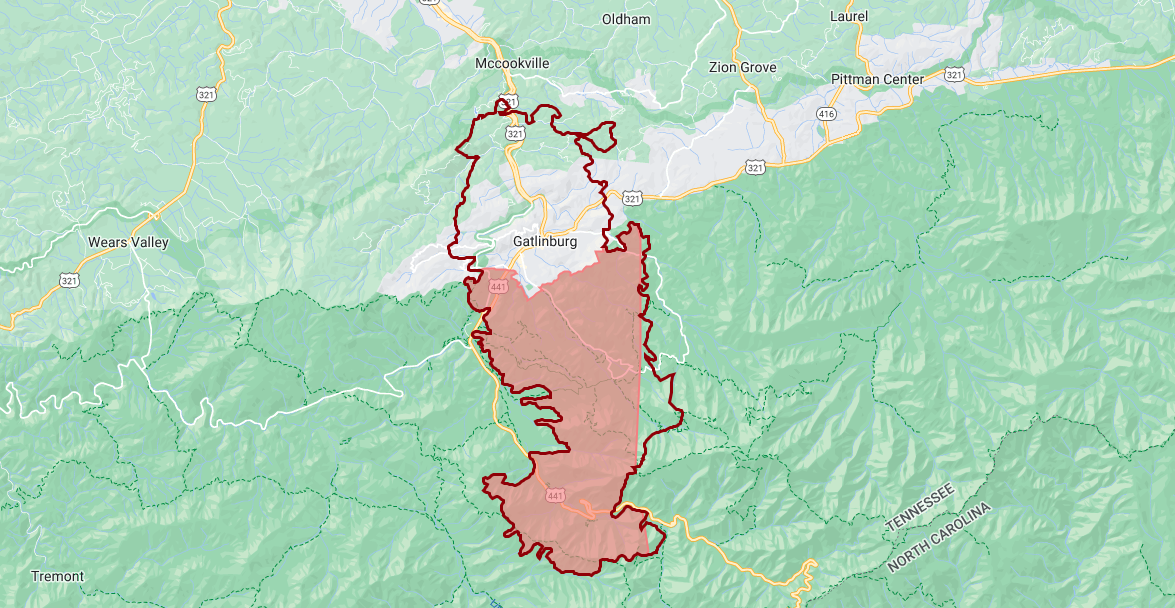

In [4]:
Image(working_dir + '/images/study_area.png')

##### **Figure 2.** Red-shaded area within the Chimney Tops 2 fire boundary denotes the Study area.

Initially, difference Canopy Height Models (dCHMs) for 2016, 2017 and 2021 NEON [AOP Lidar Data](https://www.neonscience.org/data-collection/lidar) were calculated to estimate landscape changes. Then we compared interannual AOP reflectance data measured by the [NEON Imaging Spectrometer (NIS)](https://www.neonscience.org/data-collection/imaging-spectrometer) in 2016, 2017 and 2021 with interannual data from the Operational Land Imager on the [Landsat 8](https://www.usgs.gov/landsat-missions/landsat-8) satellite for a time period from 2015 to 2023. Pre-/post- fire vegetation indices (such as NBR, NDVI, NDMI and MSI) and difference vegetation indices (dNBR, dNDVI, dNDMI) were calculated to classify wildfire severity as well as vegetation regrowth. You can find more information about how to calculate spectral vegetation indices [here](https://giscrack.com/list-of-spectral-indices-for-sentinel-and-landsat/).

All analysis was implemented in [Google Earth Engine](https://earthengine.google.com/).

# Results

## Forest Canopy Height
First let's look at high resolution Canopy Height Models of difference (dCHMs) calculated using NEON Lidar data to estimate canopy height difference.

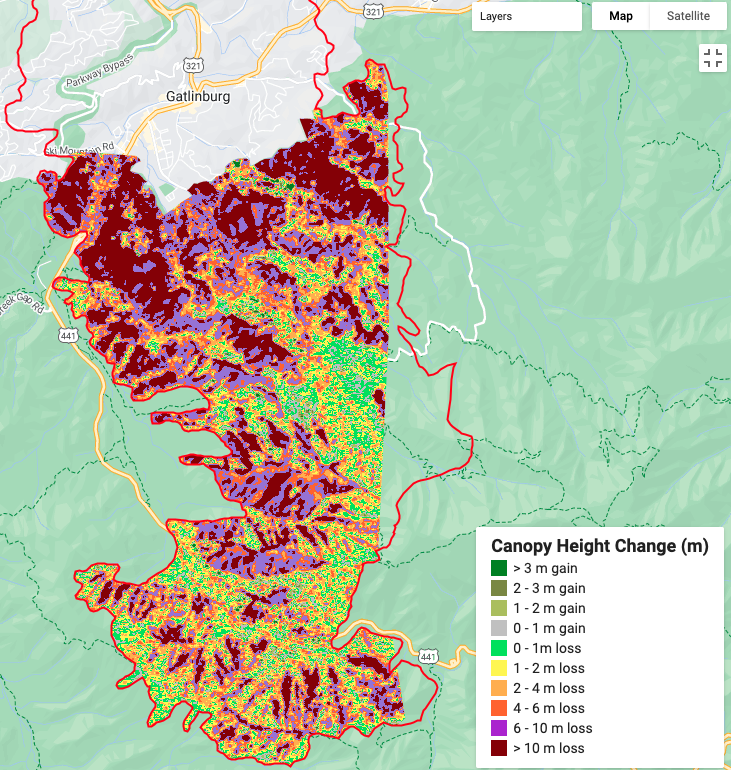

In [5]:
Image(working_dir + '/images/chm/grsm_chm_2016_2017.png')

##### **Figure 3.** dCHM between 2016 and 2017 for GRSM study area (height difference in meters).

The canopy height difference image between 2016 and 2017 (Figure 3) shows that a large part of the study area experienced significant loss of canopy height the year after the fire, in some places up to 6 meters and more. Especially northern part of the study area, around the town of Gatlinburg. In this regard, it is interesting to see how average tree height distribution changed from 2016 to 2017 (Histograms 1 and 2).

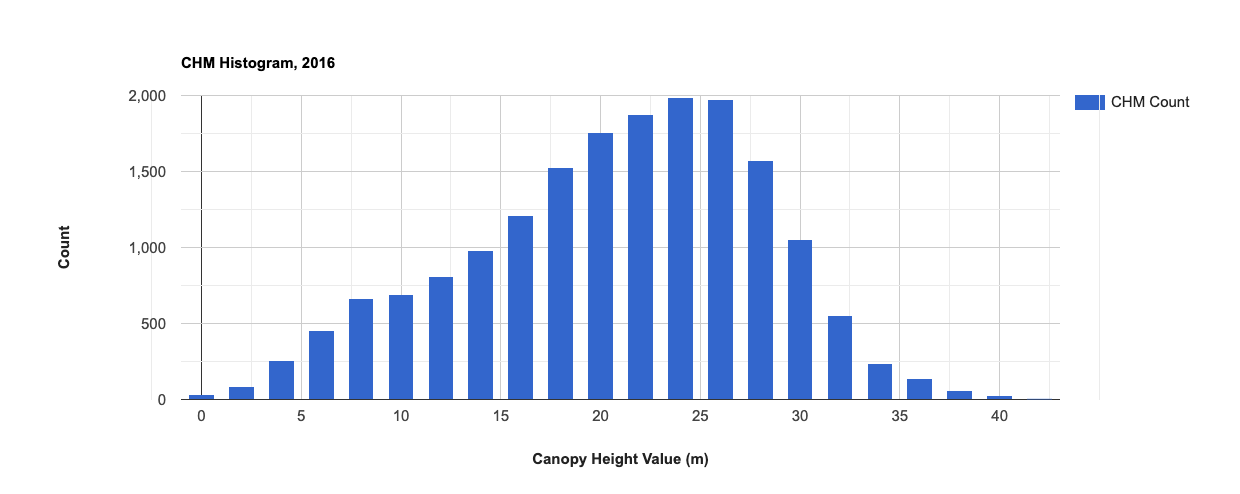

In [6]:
Image(working_dir + '/histograms/ee-2016-chm.png')

##### **Histogram 1.** Histogram of 2016 canopy height distribution inside the GRSM study area (from NEON Lidar data). 

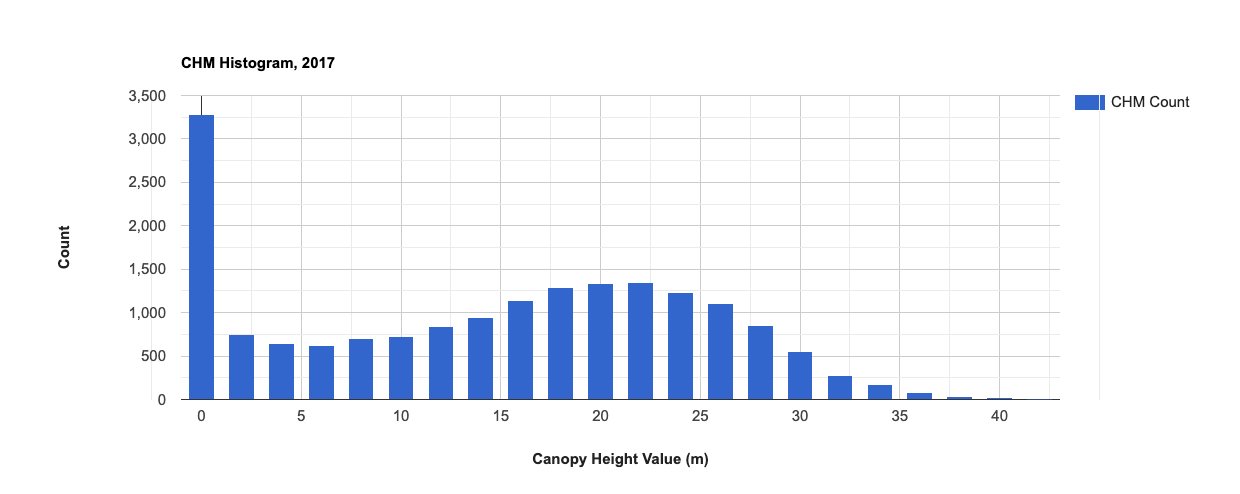

In [7]:
Image(working_dir + '/histograms/ee-2017-chm.png')

##### **Histogram 2.** Histogram of 2017 canopy height distribution inside the GRSM study area (from NEON Lidar data).

Comparing two histograms above, we can conclude that the most frequent tree height has shifted from 24-26 meters (in 2016) to ZERO (in 2017). Thus, it can be assumed that most of the burned forest was completely destroyed by fire. The second maximum of 2017 histogram (Histogram 2) is near 20 meters and is for canopy that presumably remained undamaged or partly survived.

### What about regrowth?

Now let's look at the forest recovery for the period from 2017 to 2021.

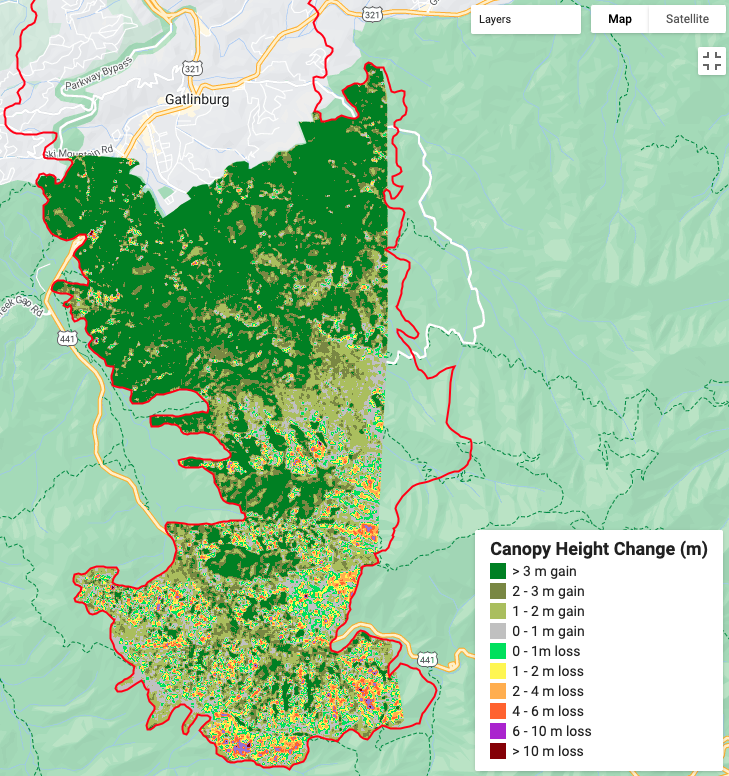

In [8]:
Image(working_dir + '/images/chm/grsm_chm_2017_2021.png')

##### **Figure 4.** dCHM between 2017 and 2021 for GRSM study area (height difference in meters).

According to the image of canopy height difference between 2017 and 2021 (Figure 4), an increase in canopy height is observed throughout all the northern part of study area by 2021. However, in the southern part of the study area there is still a decrease. On the 2021 histogram, there is a clearly seen new local maximum for a newly appeared vegetation with a canopy height of 2-4 meters (Histogram 3).

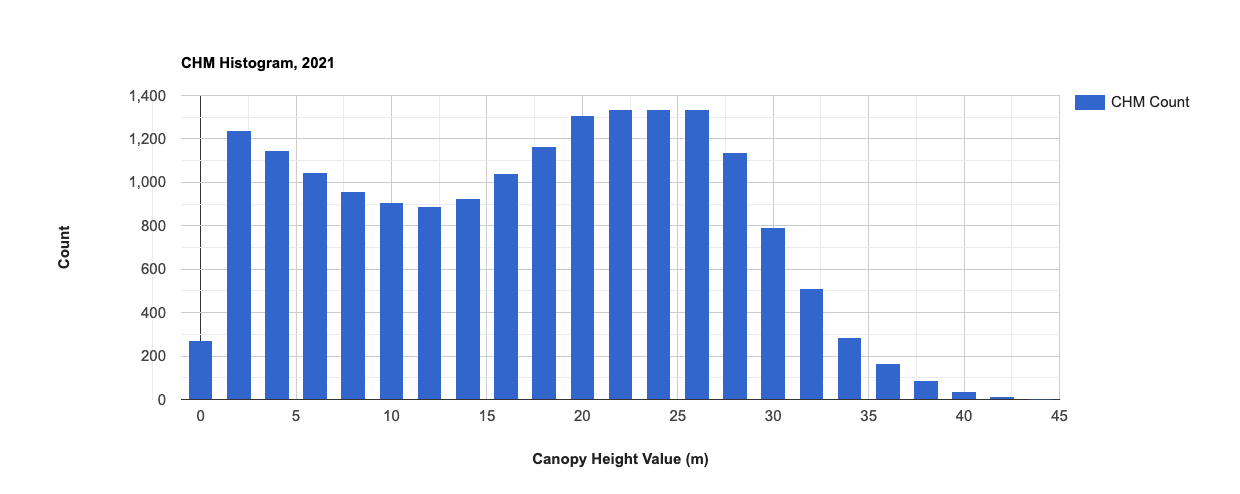

In [9]:
Image(working_dir + '/histograms/ee-2021-chm.png')

##### **Histogram 3.** Histogram of 2021 canopy height distribution inside the GRSM study area (from NEON Lidar data).

The image of difference between 2016 and 2021 (Figure 5) shows that despite the gradual regrowth of vegetation, the fire scar still influenced local ecosystem structure in 2021.

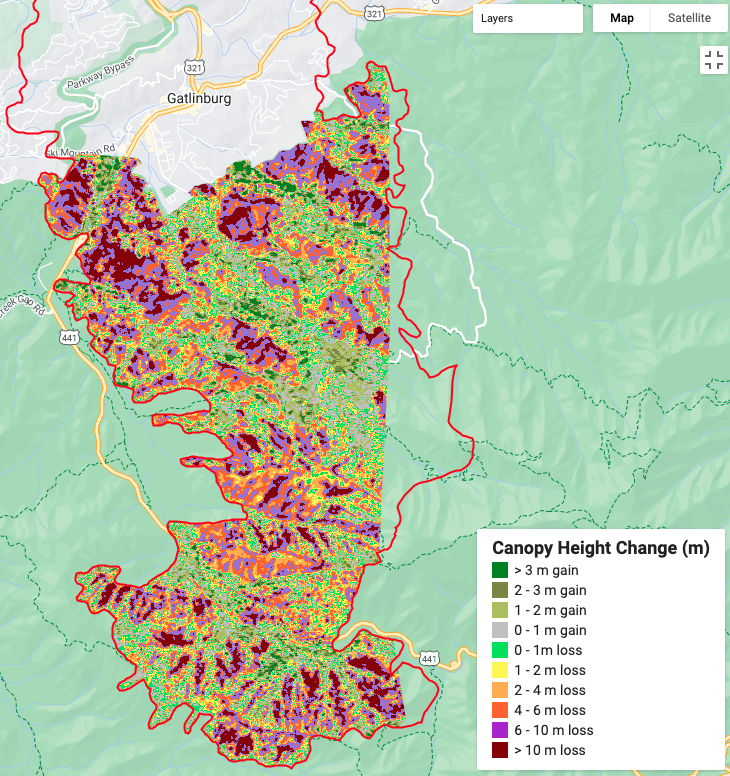

In [10]:
Image(working_dir + '/images/chm/grsm_chm_2016_2021.png')

##### **Figure 5.** dCHM between 2016 and 2021 for GRSM study area (height difference in meters).

### Mean Canopy Height by year
Generally, the following values of the mean canopy height were obtained from the NEON Lidar data for 2016, 2017 and 2021 (Figure 6).

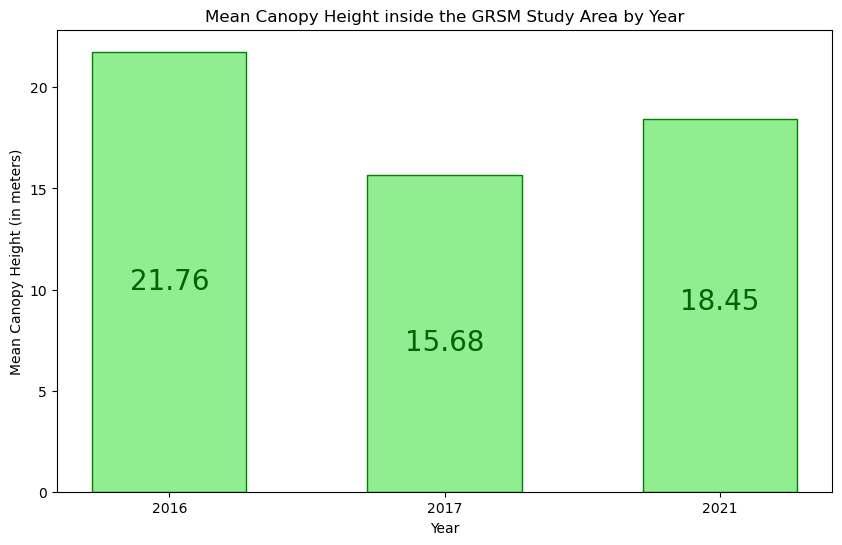

In [11]:
# Function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', fontsize = 20, color = 'darkgreen')

# Define data on which bar chart will be plot
year = ['2016','2017','2021']
canopy_height = [21.76, 15.68, 18.45]

# Set figure size
plt.figure(figsize = (10,6))

# Create the bar chart
plt.bar(year, canopy_height, color ='lightgreen', edgecolor='green',
    width = 0.56)

# Calling the function to add value labels
addlabels(year, canopy_height)

# Give title to the plot
plt.title("Mean Canopy Height inside the GRSM Study Area by Year")

# Set X and Y labels
plt.xlabel("Year")
plt.ylabel("Mean Canopy Height (in meters)")

# Visualize the chart
plt.show()

##### **Figure 6.** Mean canopy height from NEON LiDAR data for the Study area by year (in meters).

It should be noted that the newly appeared vegetation can be tall grass and shrubs. Thus, determining the species composition of newly grown vegetation can be a great future work. Studying of post-fire canopy height patterns obtained from Lidar data really matters since it can help national park staff and professionals to better identify zones of slow regrowth and put more effort into restoring these slow recovering areas.

## Vegetation Indices
### a. NEON reflectance data

Now let's look at reflectance data and vegetation indices. dNBR Image between 2016 and 2017 for NEON data (Figure 7) shows that fire impact on the forest ecosystem was substantial. Many areas affected by fire can be assigned to moderate or high fire severity classes according to [United Nations SPIDER burn severity mapping recommendations](https://www.un-spider.org/advisory-support/recommended-practices/recommended-practice-burn-severity/burn-severity-earth-engine).



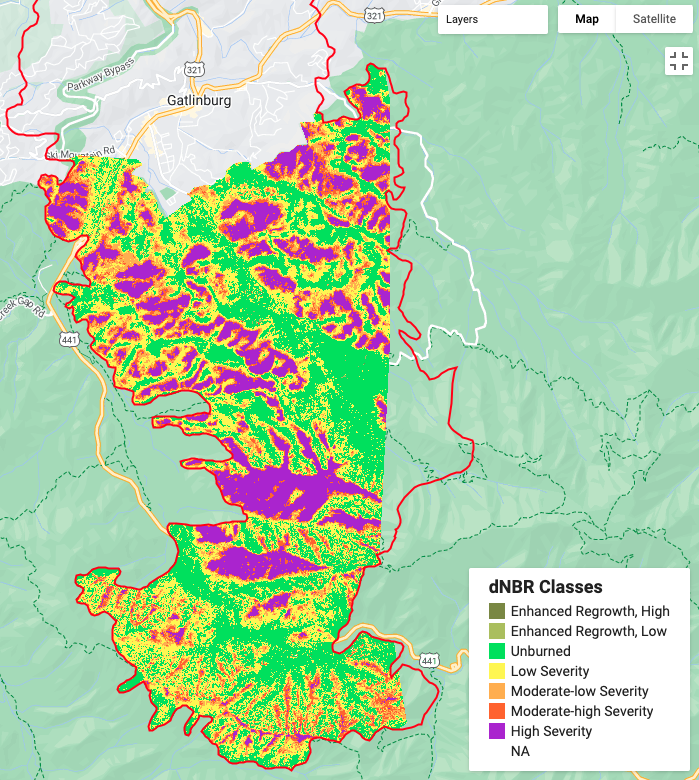

In [12]:
Image(working_dir + '/images/nbr/nis_dnbr_2017_2016.png')

##### **Figure 7.**  NEON data, dNBR between 2016 and 2017 for GRSM Study area (legend in the lower left corner denotes UN SPIDER fire severity clases).

And now let's look at the dNBR Image between 2016 and 2021 (Figure 8). It can be seen, that in 2021 the post fire scar was almost completely covered with newly grown vegetation. However, a couple of slower-recovery zones can be noted inside the Study area.

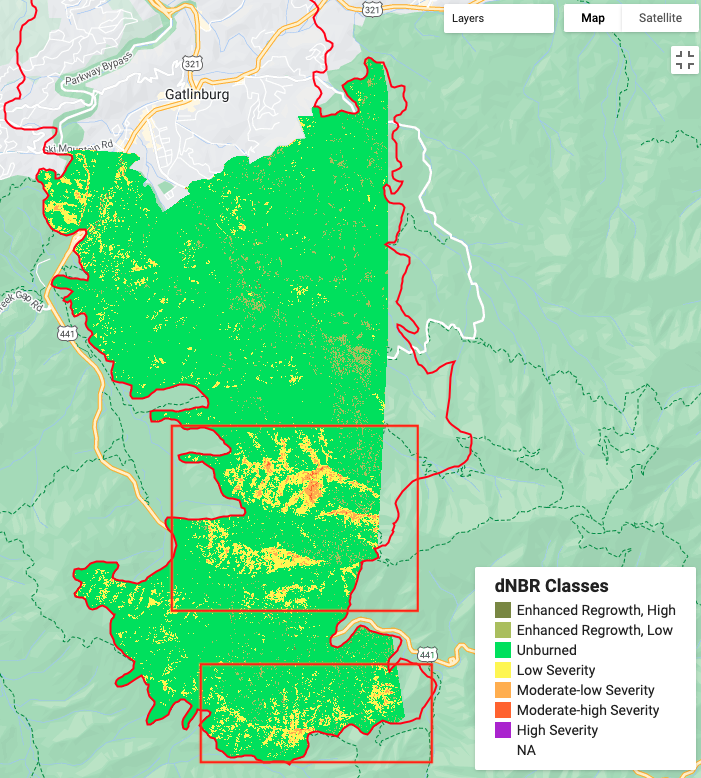

In [13]:
Image(working_dir + '/images/nbr/nis_dnbr_2021_2016.png')

##### **Figure 8.** NEON data, dNBR between 2016 and 2021 for GRSM Study area. Red rectangles denote zones of slow post-fire recovery.

### b. Landsat 8 reflectance data

The temporal data coverage provided by Landsat 8 allowed us to use the most recent observation data from 2023. So let’s have a look at the Landsat data from 2015 to 2023.

The dNBR image between 2015 and 2017 (Figure 9) shows similar patterns to what we saw with the NEON data (Figure 7) for the first year after the fire.

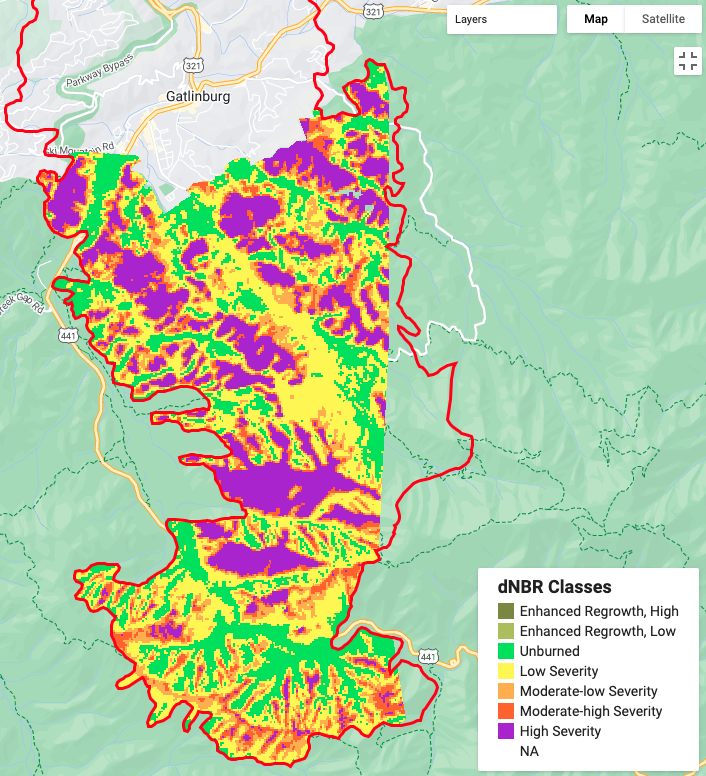

In [14]:
Image(working_dir + '/images/nbr/ls_dnbr_2015_2017.png')

##### **Figure 9.**  Landsat 8 data, dNBR between 2015 and 2017 for GRSM Study area (legend in the lower left corner denotes UN SPIDER fire severity clases).

The dNBR image between 2015 and 2023 (Figure 10) shows that the same slower-regrowth zones as seen in the NEON 2016/2021 dNBR data are visible in the post-fire dNBR Landsat data until present.

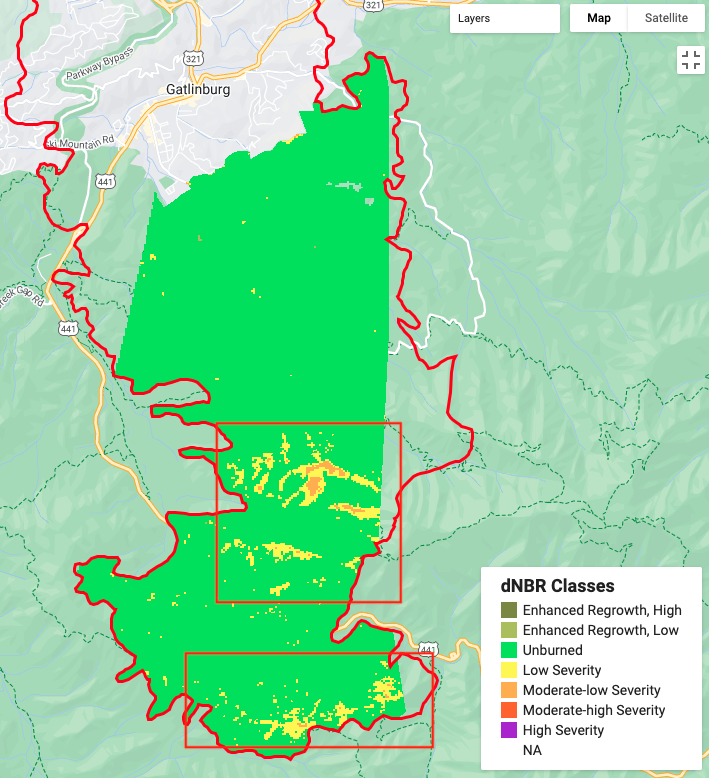

In [15]:
Image(working_dir + '/images/nbr/ls_dnbr_2015_2023.png')

##### **Figure 10.** Landsat 8 data, dNBR between 2015 and 2023 for GRSM Study area. Red rectangles denote zones of slower post-fire recovery.

Similar slower-recovery zones are also observed for other calculated difference indices, such as  dNDVI and dNDMI (Figure 11 and Figure 12, respectively).

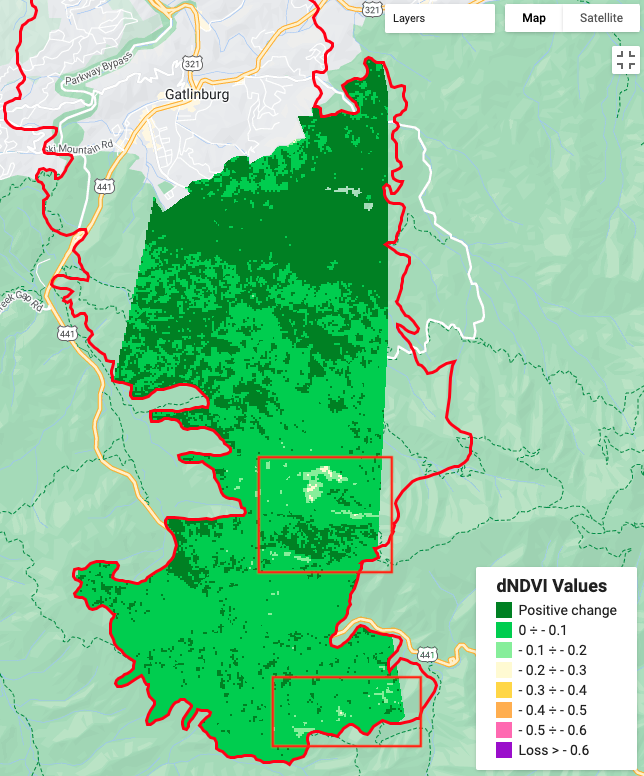

In [16]:
Image(working_dir + '/images/ndvi/ls_dndvi_2015_2023.png')

##### **Figure 11.** Landsat 8 data, dNDVI between 2015 and 2023 for GRSM Study area. Red rectangles denote zones of slower post-fire recovery.

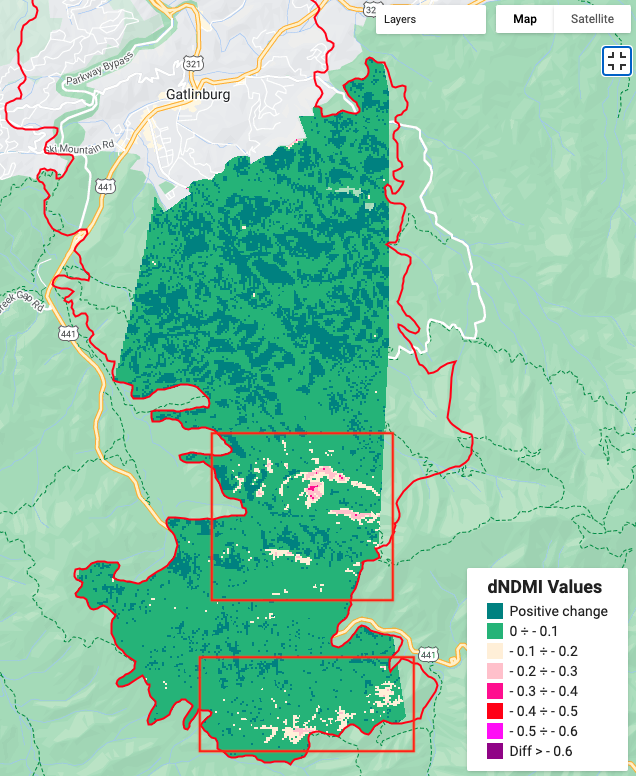

In [17]:
Image(working_dir + '/images/ndmi/ls_dndmi_2015_2023.png')

##### **Figure 12.** Landsat 8 data, dNDMI between 2015 and 2023 for GRSM Study area. Red rectangles denote zones of slower post-fire recovery.

### Time series charts of vegetation indices
Time series of the annual vegetation indices mean values also show the impact of the fire event as well as the post-fire recovery progression (Figure 13).

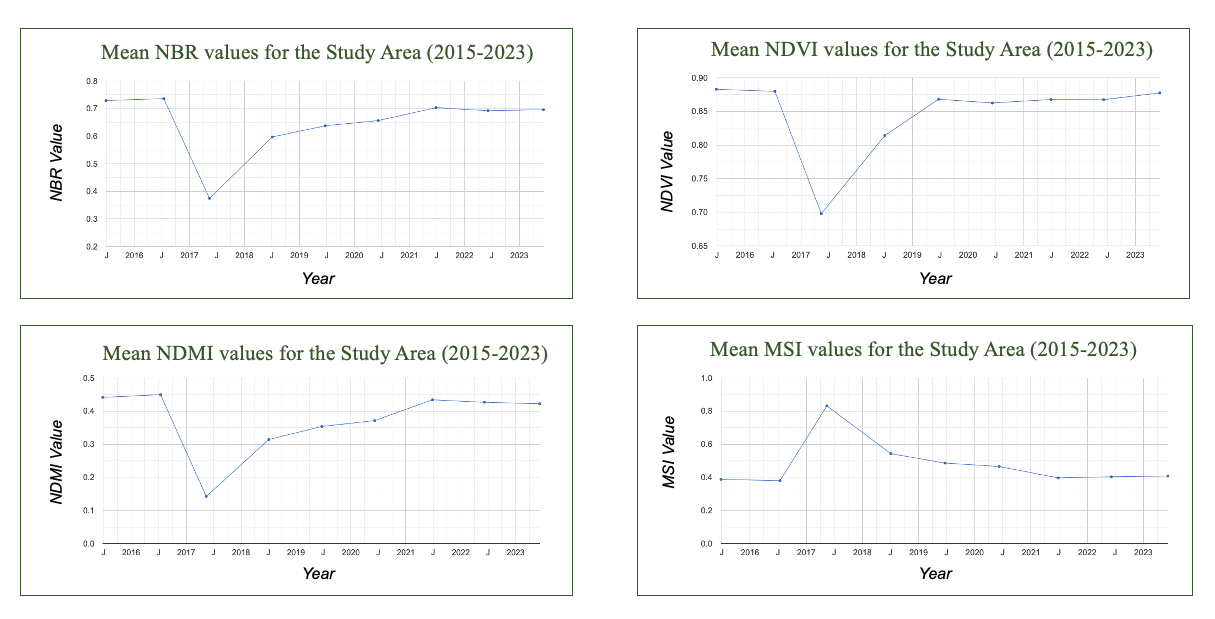

In [18]:
Image(working_dir + '/images/ls_time_series.png')

##### **Figure 13.** Landsat 8 data, time series of the annual vegetation indices mean values [NBR, NDVI, NDMI. MSI].

However reforestation is a long process and as mentioned above the species that are growing in the burn scar are probably early succession species like grass or shrubs.

## Next steps

In sum, we can conclude that GEE is a powerful tool for visualizing and analyzing landscape changes. To continue this study, the next steps can be taken:

1. Estimate vegetation species composition change after a wildfire
2. Determine factors affecting forest recovery rates in the identified slower regrowth zones
3. Supplement NEON data time series with new airborne observations published in GEE

## Additional materials and complete research repository 

Based on materials used in this study, a tutorial was created and posted on the NEON's Learning Hub:
https://www.neonscience.org/resources/learning-hub/tutorials/aop-gee-wildfire

Learn more about our post-wildfire vegetation regrowth analysis on GitHub using a link below:   
https://github.com/StepanBryleev/post-wildfire-vegetation-regrowth-analysis

## References

**1**.Guthrie, V., Finucane, M., Keith, P., and Stinnett, D. (2017). After action review of the
november 28, 2016. United States: Firestorm.

**2**.Park T and Sim S (2023), Characterizing spatial burn severity patterns of 2016 Chimney Tops 2 fire using multitemporal Landsat and NEON LiDAR data. Front. Remote Sens. 4:1096000. doi: 10.3389/frsen.2023.1096000


**3**.Hagmann, R. K. et al. Evidence for widespread changes in the structure, composition, and fire regimes of western North American forests, 2021. Ecol. Appl. https://doi.org/10.1002/eap.2431 


**4**.Dennison, P.E.; Brewer, S.C.; Arnold, J.D.; Moritz, M.A. Large wildfire trends in the western United States, 1984–2011. Geophys. Res. Lett. 2014, 41, 2928–2933. 


**5**.Balch, J.K.; Bradley, B.A.; Abatzoglou, J.T.; Nagy, R.C.; Fusco, E.J.; Mahood, A.L. Human-started wildfires expand the fire niche across the United States. Proc. Natl. Acad. Sci. USA 2017, 114, 2946–2951.


**6**.Szpakowski, D. M., and Jensen, J. L. (2019). A review of the applications of remote
sensing in fire ecology. Remote Sens. 11, 2638. doi:10.3390/rs11222638

In [19]:
# Hide code cells and convert to html
#!jupyter nbconvert --to html --no-input vegetation_regrowth_analysis.ipynb